<a href="https://colab.research.google.com/github/gKorada/AlphabetSoup/blob/master/5_minute_vis_Goutham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5 Minute Vis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Large Data Sets for Python/worlddata.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [ ]:
df

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00


Possible comparisons: hospital beds vs life expectancy vs population?
Net Official development assitance vs Mortality Rate?
Electricity production from renewable resources, excluding hydro vs CO2 emissions?
Agriculture, value added vs CO2 emmissions?


In [ ]:
for i in df.IndicatorName.unique():
  print(i)



Adolescent fertility rate (births per 1,000 women ages 15-19)
Age dependency ratio (% of working-age population)
Age dependency ratio, old (% of working-age population)
Age dependency ratio, young (% of working-age population)
Arms exports (SIPRI trend indicator values)
Arms imports (SIPRI trend indicator values)
Birth rate, crude (per 1,000 people)
CO2 emissions (kt)
CO2 emissions (metric tons per capita)
CO2 emissions from gaseous fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (kt)
CO2 emissions from solid fuel consumption (% of total)
Death rate, crude (per 1,000 people)
Fertility rate, total (births per woman)
Fixed telephone subscriptions
Fixed telephone subscriptions (per 100 people)
Hospital beds (per 1,000 people)
International migrant stock (% of population)
International migrant stock, total
Life expectancy at birth, female (years)
Life expectancy at birth, male (years)
Life expectancy at birth,

Hospital Beds vs Mortality rate seems is the most interesting one for me!

In [ ]:
wdiselect = df[(df['IndicatorName']=="Hospital beds (per 1,000 people)") \
                       & (df['Year']==2010)]
wdiselect.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4839785,Caribbean small states,CSS,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2010,2.380990
4840379,Central Europe and the Baltics,CEB,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2010,6.497921
4841033,East Asia & Pacific (all income levels),EAS,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2010,2.985314
4841702,East Asia & Pacific (developing only),EAP,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2010,2.974029
4842503,Euro area,EMU,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2010,5.740205


In [ ]:
data = wdiselect[['CountryCode', 'Value']]
data.head()

,CountryCode,Value
4839785,CSS,2.380990
4840379,CEB,6.497921
4841033,EAS,2.985314
4841702,EAP,2.974029
4842503,EMU,5.740205


In [ ]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
world_geo = f'{url}/world-countries.json' # for world map with country boundaries
world_geo

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

Just wanted to try a chloropeth

In [ ]:
from urllib.request import urlopen
import json


import plotly.express as px

fig = px.choropleth(data, geojson=world_geo, locations='CountryCode', color='Value',
                           color_continuous_scale="Viridis",
                           range_color=(data.Value.min(), data.Value.max()),
                          #  scope="usa",
                           labels={"Hospital beds (per 1,000 people)"}
                          )
fig.show()

In [ ]:
data.count()

,0
CountryCode,112
Value,112


In [ ]:

data_new = data.sort_values(by = ['Value'], ascending = False)
data_new.head()

,CountryCode,Value
4918198,DEU,8.25
4869936,AUT,7.63
4927872,HUN,7.18
4902679,CZE,7.01
4948977,LTU,6.75


<Axes: xlabel='CountryCode', ylabel='Value'>

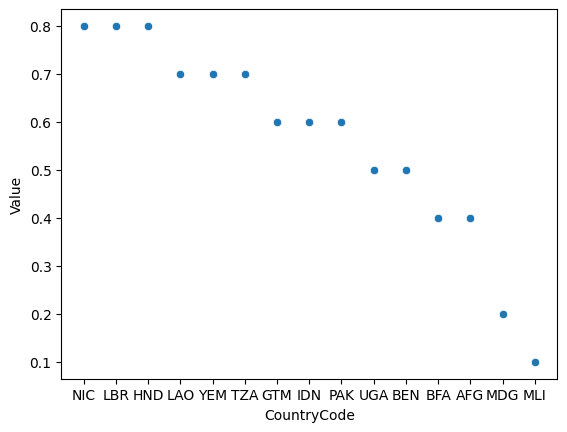

In [ ]:
sns.scatterplot(data=data_new.tail(15), x='CountryCode', y='Value')


<Axes: xlabel='CountryCode', ylabel='Value'>

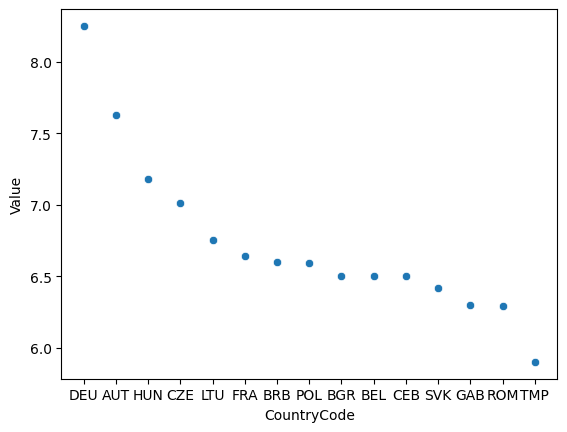

In [ ]:
sns.scatterplot(data=data_new.head(15), x='CountryCode', y='Value')

For the low 15, is is VERY similar to a step-wise function, whereas the top 15 is extremely similar to a exponential function

Getting and prepping Infant Mortality Data:

In [ ]:
wdiselect2 = df[(df['IndicatorName']=="Mortality rate, infant (per 1,000 live births)") \
                       & (df['Year']==2010)]
wdiselect2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4839361,Arab World,ARB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2010,32.281703
4839908,Caribbean small states,CSS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2010,18.796829
4840531,Central Europe and the Baltics,CEB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2010,6.746708
4841169,East Asia & Pacific (all income levels),EAS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2010,18.211707
4841860,East Asia & Pacific (developing only),EAP,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2010,19.200000


In [ ]:
data_infant = wdiselect2[['CountryCode', 'Value']]
data_infant.head()

,CountryCode,Value
4839361,ARB,32.281703
4839908,CSS,18.796829
4840531,CEB,6.746708
4841169,EAS,18.211707
4841860,EAP,19.200000


In [ ]:
data_infant_new = data_infant.sort_values(by = ['Value'], ascending = False)
data_infant_new.head()

,CountryCode,Value
4865619,AGO,109.6
4991575,SLE,107.0
4891209,CAF,101.7
4995154,SOM,97.8
4892002,TCD,93.6


<Axes: xlabel='CountryCode', ylabel='Value'>

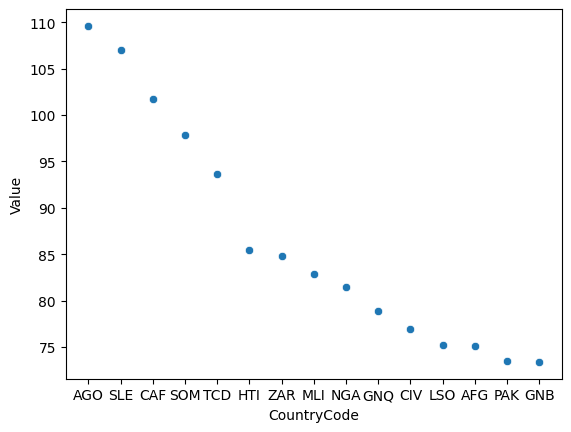

In [ ]:
sns.scatterplot(data=data_infant_new.head(15), x='CountryCode', y='Value')

<Axes: xlabel='CountryCode', ylabel='Value'>

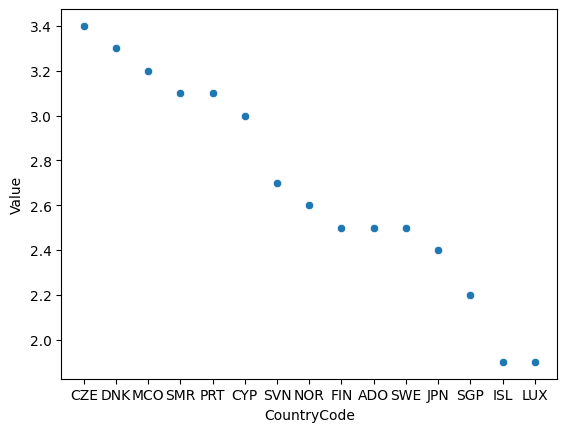

In [ ]:
sns.scatterplot(data=data_infant_new.tail(15), x='CountryCode', y='Value')

Very Similar graphs, but the top 15 is more exponential thatn the bottom 15

Getting Female Moratlity Rate Data:

In [ ]:
wdiselect3 = df[(df['IndicatorName']=="Mortality rate, adult, female (per 1,000 female adults)") \
                       & (df['Year']==2010)]
wdiselect3.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4839359,Arab World,ARB,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,2010,123.519319
4839906,Caribbean small states,CSS,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,2010,127.696270
4841167,East Asia & Pacific (all income levels),EAS,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,2010,92.821888
4841858,East Asia & Pacific (developing only),EAP,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,2010,97.750113
4842650,Euro area,EMU,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,2010,51.411001


In [ ]:
data_female = wdiselect3[['CountryCode', 'Value']]
data_female.head()

,CountryCode,Value
4839359,ARB,123.519319
4839906,CSS,127.696270
4841167,EAS,92.821888
4841858,EAP,97.750113
4842650,EMU,51.411001


In [ ]:
data_female_new = data_female.sort_values(by = ['Value'], ascending = False)
data_female_new.head()

,CountryCode,Value
4946744,LSO,616.8490
5002694,SWZ,580.1270
5025908,ZWE,548.2190
4996005,ZAF,457.2806
4891207,CAF,433.3270


Visulizing Data:

<Axes: xlabel='CountryCode', ylabel='Value'>

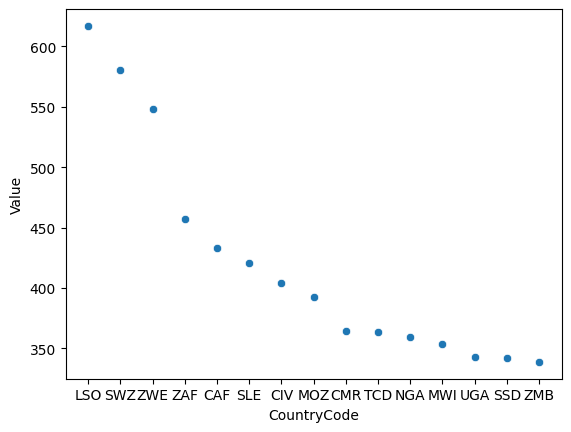

In [ ]:
sns.scatterplot(data=data_female_new.head(15), x='CountryCode', y='Value')

<Axes: xlabel='CountryCode', ylabel='Value'>

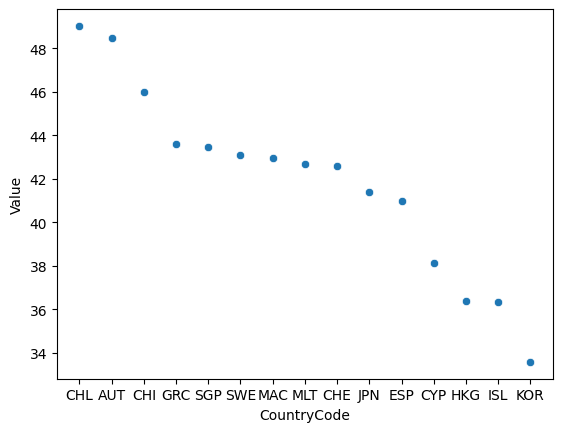

In [ ]:
sns.scatterplot(data=data_female_new.tail(15), x='CountryCode', y='Value')

For the top and lowest 15, shape is similar but for the low 15 there is somewhat of a constant in the middle


Getting Male Mortality Rate data and sorting it for visualizations:

In [ ]:
wdiselect4 = df[(df['IndicatorName']=="Mortality rate, adult, male (per 1,000 male adults)") \
                       & (df['Year']==2010)]
wdiselect4.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4839360,Arab World,ARB,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,2010,172.771489
4839907,Caribbean small states,CSS,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,2010,209.857314
4841168,East Asia & Pacific (all income levels),EAS,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,2010,137.165422
4841859,East Asia & Pacific (developing only),EAP,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,2010,141.667751
4842651,Euro area,EMU,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,2010,106.933215


In [ ]:
data_male = wdiselect4[['CountryCode', 'Value']]
data_male.head()

,CountryCode,Value
4839360,ARB,172.771489
4839907,CSS,209.857314
4841168,EAS,137.165422
4841859,EAP,141.667751
4842651,EMU,106.933215


In [ ]:
data_male_new = data_male.sort_values(by = ['Value'], ascending = False)
data_male_new.head()

,CountryCode,Value
4946745,LSO,607.7280
5002695,SWZ,562.4120
5025909,ZWE,557.4750
4996006,ZAF,494.7554
4891208,CAF,465.2460


Displaying both Top 15 and Low 15 for mortality rates

<Axes: xlabel='CountryCode', ylabel='Value'>

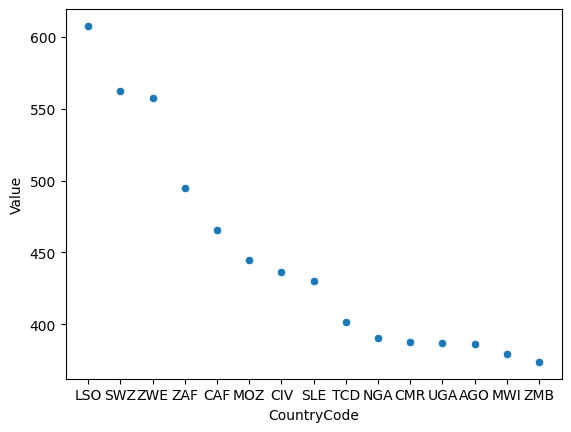

In [ ]:
sns.scatterplot(data=data_male_new.head(15), x='CountryCode', y='Value')

<Axes: xlabel='CountryCode', ylabel='Value'>

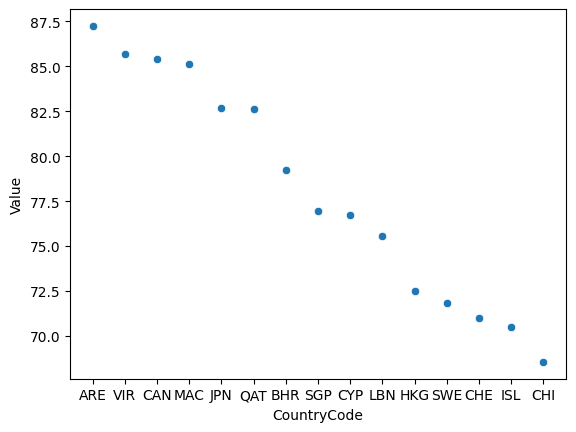

In [ ]:
sns.scatterplot(data=data_male_new.tail(15), x='CountryCode', y='Value')

Similar trends, but the lower 15 is more step-wiseish


Combining Data sets to help with visualizations and so we find countires that match in both sets of data


In [ ]:
data_common_infant = pd.merge(data, data_infant,  on='CountryCode', how = 'inner')
data_common_infant = data_common_infant.rename(columns={'Value_x': 'Hospital_beds', 'Value_y': 'Mortality_rate'})
data_common_infant.head()

,CountryCode,Hospital_beds,Mortality_rate
0,CSS,2.380990,18.796829
1,CEB,6.497921,6.746708
2,EAS,2.985314,18.211707
3,EAP,2.974029,19.200000
4,EMU,5.740205,3.648835


In [ ]:
data_common_female = pd.merge(data, data_female,  on='CountryCode', how = 'inner')
data_common_female = data_common_female.rename(columns={'Value_x': 'Hospital_beds', 'Value_y': 'Mortality_rate'})
data_common_female.head()

,CountryCode,Hospital_beds,Mortality_rate
0,CSS,2.380990,127.696270
1,EAS,2.985314,92.821888
2,EAP,2.974029,97.750113
3,EMU,5.740205,51.411001
4,ECS,5.002894,86.114832


In [ ]:
data_common_male  = pd.merge(data, data_male,  on='CountryCode', how = 'inner')
data_common_male = data_common_male.rename(columns={'Value_x': 'Hospital_beds', 'Value_y': 'Mortality_rate'})
data_common_male.head()

,CountryCode,Hospital_beds,Mortality_rate
0,CSS,2.380990,209.857314
1,EAS,2.985314,137.165422
2,EAP,2.974029,141.667751
3,EMU,5.740205,106.933215
4,ECS,5.002894,191.855882


Displaying combined data sets:

Text(0, 0.5, 'Mortality rate, infant (per 1,000 live births)')

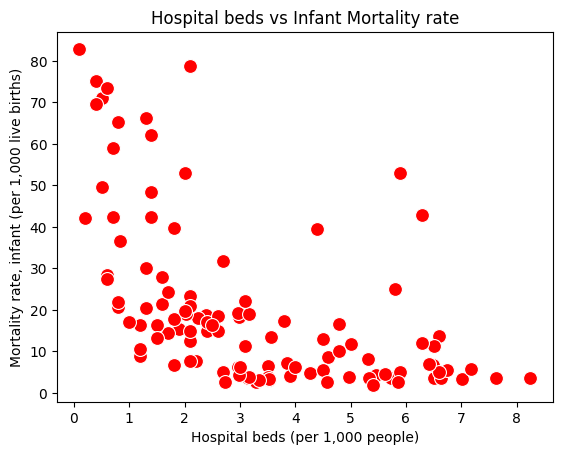

In [ ]:
sns.scatterplot(data=data_common_infant, x='Hospital_beds', y='Mortality_rate', s = 100, color = 'Red')
plt.title('Hospital beds vs Infant Mortality rate')
plt.xlabel('Hospital beds (per 1,000 people)')
plt.ylabel('Mortality rate, infant (per 1,000 live births)')

Text(0, 0.5, 'Mortality rate, adult, female (per 1,000 female adults)')

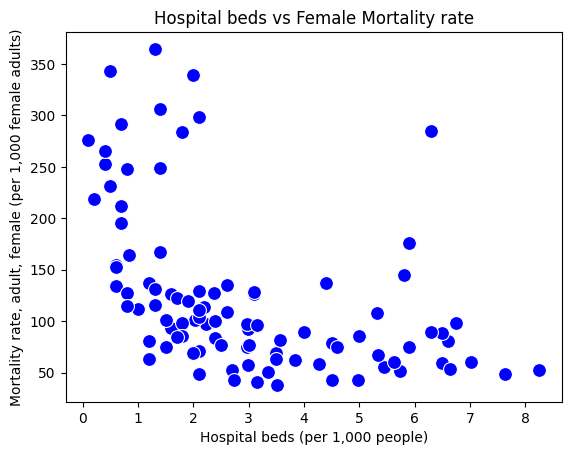

In [ ]:
sns.scatterplot(data=data_common_female, x='Hospital_beds', y='Mortality_rate', s = 100, color = 'Blue')
plt.title('Hospital beds vs Female Mortality rate')
plt.xlabel('Hospital beds (per 1,000 people)')
plt.ylabel('Mortality rate, adult, female (per 1,000 female adults)')

Text(0, 0.5, 'Mortality rate, adult, male (per 1,000 male adults)')

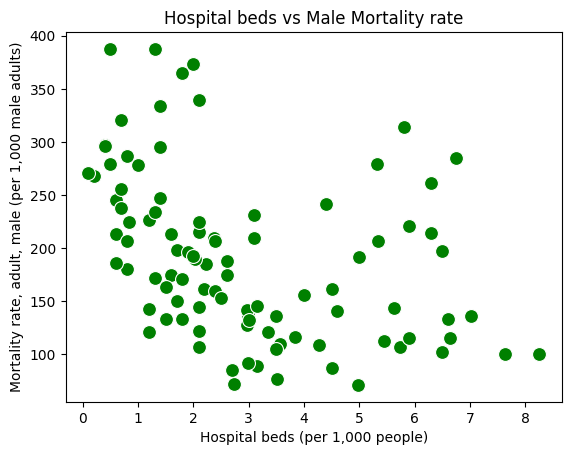

In [ ]:
sns.scatterplot(data=data_common_male, x='Hospital_beds', y='Mortality_rate', s = 100, color = 'Green')
plt.title('Hospital beds vs Male Mortality rate')
plt.xlabel('Hospital beds (per 1,000 people)')
plt.ylabel('Mortality rate, adult, male (per 1,000 male adults)')



*   Infant and Female graph is almost exponential
*   Male graph is a lot more random
*   Could be caused by a bunch of factors, but we will find out!




